In [2]:
import pandas as pd
restricted_df = pd.read_csv("../data/income-restricted-inventory-2021.csv")

In [34]:
restricted_df.head()
# Add up all income_restricted units for a neighborhood
# compare total hazardous cinditions violations to 
total_restricted = restricted_df.groupby(['Neighborhood'])['Total Income-Restricted'].sum()

total_restricted = total_restricted.reset_index()
total_restricted['Location'] = total_restricted.apply(lambda x: str(x['Neighborhood']).lower().replace(' ', ''), axis = 1)




,Neighborhood,Total Income-Restricted,Location
0,Allston,931,allston
1,Back Bay,681,backbay
2,Bay Village,40,bayvillage
3,Beacon Hill,343,beaconhill
4,Brighton,3412,brighton
5,Charlestown,2405,charlestown
6,Chinatown,1227,chinatown
7,Dorchester,8607,dorchester
8,Downtown,930,downtown
9,East Boston,2761,eastboston


In [11]:
cities_df = pd.read_csv("../data/cities_df.csv")
cities_df.head()

,Unnamed: 0,Location,Hot Water,Potable Water,Heating Facilities Required,Temperature Requirements,Asbestos Material,Use of Lead Paint Prohibited,Safe Condition,Smoke Detectors and Carbon Monoxide Alarms,Total
0,0,boston,30.0,1.0,45.0,40.0,0.0,0.0,2.0,121.0,116.0
1,1,dorchester,29.0,3.0,41.0,32.0,0.0,1.0,7.0,181.0,106.0
2,2,roxbury,15.0,0.0,17.0,12.0,0.0,0.0,1.0,43.0,44.0
3,3,jamaicaplain,10.0,1.0,14.0,7.0,0.0,0.0,3.0,27.0,32.0
4,18,southboston,2.0,0.0,21.0,9.0,0.0,0.0,1.0,26.0,32.0


In [41]:
new_df = pd.merge(cities_df, total_restricted, how = 'left', on = 'Location')
new_df['Neighborhood'] = new_df['Neighborhood'].fillna("None")
new_df['Total Income-Restricted'] = new_df['Total Income-Restricted'].fillna(0)
new_df.head()

,Unnamed: 0,Location,Hot Water,Potable Water,Heating Facilities Required,Temperature Requirements,Asbestos Material,Use of Lead Paint Prohibited,Safe Condition,Smoke Detectors and Carbon Monoxide Alarms,Total,Neighborhood,Total Income-Restricted
0,0,boston,30.0,1.0,45.0,40.0,0.0,0.0,2.0,121.0,116.0,None,0.0
1,1,dorchester,29.0,3.0,41.0,32.0,0.0,1.0,7.0,181.0,106.0,Dorchester,8607.0
2,2,roxbury,15.0,0.0,17.0,12.0,0.0,0.0,1.0,43.0,44.0,Roxbury,10850.0
3,3,jamaicaplain,10.0,1.0,14.0,7.0,0.0,0.0,3.0,27.0,32.0,Jamaica Plain,4001.0
4,18,southboston,2.0,0.0,21.0,9.0,0.0,0.0,1.0,26.0,32.0,South Boston,3389.0


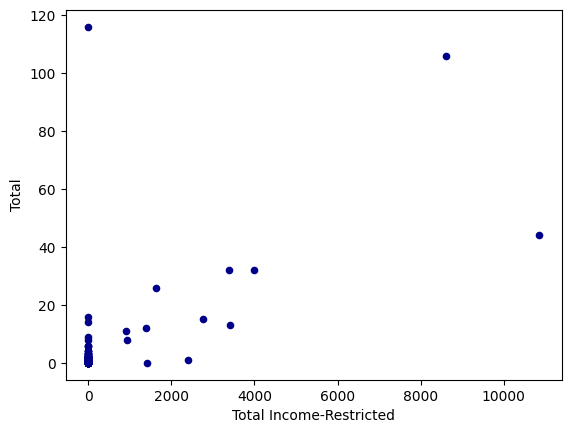

In [43]:
ax1 = new_df.plot.scatter(x='Total Income-Restricted', y='Total', c='DarkBlue')